<div>
    <h1><center style="background-color:#C39BD3; color:white;"> 🚀 Spaceship Titanic 🚀</center></h1>
</div>

<div>
<center><img src="https://i.pinimg.com/originals/f0/f3/c2/f0f3c2e06ceaf6bfaf439f27a0a4de83.gif" width = '500px'
 height = '400px'></center>
</div>

<div>
<img src=https://i.pinimg.com/originals/72/2e/d4/722ed4271802efddb517f0d9234ca375.gi>
</div>

# Importing Libraries

<div>
    <h3><center style="background-color: #7b7d7d; color:white;">
    <strong>Importing Librariees 📚</strong></center></h3>
</div>

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from collections import Counter
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

In [3]:
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
custom_color = ["#17202a",'#e03232', '#b60337', '#fa3f75', '#fa0c40', '#f4d03f']
customPalette = sns.set_palette(sns.color_palette(custom_color))

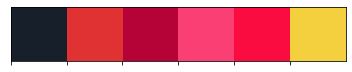

In [5]:
sns.palplot(sns.color_palette(custom_color), size=1)

In [6]:
YELLOW = sns.dark_palette(custom_color[4], reverse=False)
PINK = sns.dark_palette(custom_color[3])
# plt.show()
# sns.color_palette(sns.dark_palette(custom_color[1], reverse=False))

In [7]:
sns.color_palette(PINK)

[(0.18477345381581842, 0.13516407039450562, 0.1432407751637511),
 (0.3438971944252037, 0.15754302102148685, 0.20635732601335383),
 (0.5030209350345891, 0.17992197164846807, 0.26947387686295654),
 (0.6621446756439744, 0.20230092227544932, 0.33259042771255926),
 (0.8212684162533598, 0.22467987290243055, 0.39570697856216197),
 (0.9803921568627451, 0.24705882352941178, 0.4588235294117647)]

In [8]:
train_df = pd.read_csv('train.csv')

# Loading dataset

<div>
    <h3><center style="background-color:#7b7d7d; color:white;"> <strong>Loading Dataset and Displaying rows</strong></center></h3>
</div>

In [9]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<h5> So now we have imported the dataset, now let's check the datatype of each column

May be there is any mixture of different datatypes in single columns 

So lets check that first <h5>

# Exploratory Data Analysis

In [10]:
train_df.shape

(8693, 14)

## Checking dtypes

In [11]:
print(f"{y_} Data types of data columns: \n{m_}{train_df.dtypes}")

print(f'{r_}\nOccurance of Dtypes')
[print(f"{g_}{values} Features/columns have dtype {keys}") for keys, values in Counter(train_df.dtypes).items()]

 Data types of data columns: 
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Occurance of Dtypes
7 Features/columns have dtype object
6 Features/columns have dtype float64
1 Features/columns have dtype bool


[None, None, None]

In [12]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


But VIP should be Bool. so let's check that, whether any other values except True and False are present in VIP or not

In [13]:
train_df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

So the dataset is clear from any mixing dtype, we can change dtype of VIP to bool

In [14]:
train_df['VIP'] = train_df[['VIP']].astype(bool)

## Check for Null values

<div>
    <h4><center style="background-color:#e03232; color:black">
     So we have many null values</center>
    </h4>
</div>

In [15]:
Na_df = pd.DataFrame(train_df.isnull().sum().sort_values(), columns= ['counts'] )
Na_df['percentage'] = (Na_df['counts']/8693)*100
Na_df

,counts,percentage
PassengerId,0,0.000000
VIP,0,0.000000
Transported,0,0.000000
Age,179,2.059128
RoomService,181,2.082135
Destination,182,2.093639
FoodCourt,183,2.105142
Spa,183,2.105142
VRDeck,188,2.162660
Cabin,199,2.289198


In [16]:
fig = px.imshow(train_df.isnull(), height = 480)
# fig.update_layout(title_text = 'Null values', title_x = 0.5)
fig.show()


<p>
From Null value table and heat map, we conclude that there are null values and highest percentage of its occurance is 2.5%, so we can drop null values but as we can see from heatmap the null values are in different rows that is if we drop all null values data will reduced far greater that 2.5% or may be upto 10%</p>


So lets try dropping method first



### Dropping Null values

In [17]:
train_df_not_null = train_df.dropna(axis = 0).reset_index(drop = True)
print(f"{m_}Shape of DataFrame after removing Null values is {train_df_not_null.shape}")
print(f"{g_}Hence the Data is reduced by {(train_df.shape[0]-train_df_not_null.shape[0])*100/8693}")

Shape of DataFrame after removing Null values is (6771, 14)
Hence the Data is reduced by 22.109743471758886


🙄🙄😲 What !! The dataset is reduced by 22% 

So we have to replace Null values

### Replace Null values

In [18]:
# First lets take a look on rows having null values
df_null = train_df[train_df.isnull().any(axis = 1)]
df_null.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
40,0039_01,Earth,True,G/1/P,55 Cancri e,30.0,False,0.0,0.0,NaN,0.0,0.0,Jorgie Batthewitt,False


In [19]:
train_df_1 = train_df.copy()

#### Filling Na values in CryoSleep

I think, the costs/Rates of Services plays very important role in CryoSleep. So let's Find out.

##### contains only True value for CryoSleep

In [20]:
cryo_true = train_df_not_null[train_df_not_null.CryoSleep == True]
cryo_true.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
14,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
17,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
18,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False
27,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True


In [21]:
print(f"{b_}The Observations having CryoSleep True is {cryo_true.shape[0]}")

The Observations having CryoSleep True is 2396


In [22]:
[print(f"\n{bl_}{name} column have {y_}min value {value.min()} {bl_}and max value {y_}{value.max()}") 
    for name, value in cryo_true.iteritems() if (value.dtype !=object)]


Age column have min value 0.0 and max value 78.0

VIP column have min value False and max value True

RoomService column have min value 0.0 and max value 0.0

FoodCourt column have min value 0.0 and max value 0.0

ShoppingMall column have min value 0.0 and max value 0.0

Spa column have min value 0.0 and max value 0.0

VRDeck column have min value 0.0 and max value 0.0

Transported column have min value False and max value True


[None, None, None, None, None, None, None, None]

<AxesSubplot:xlabel='VIP', ylabel='count'>

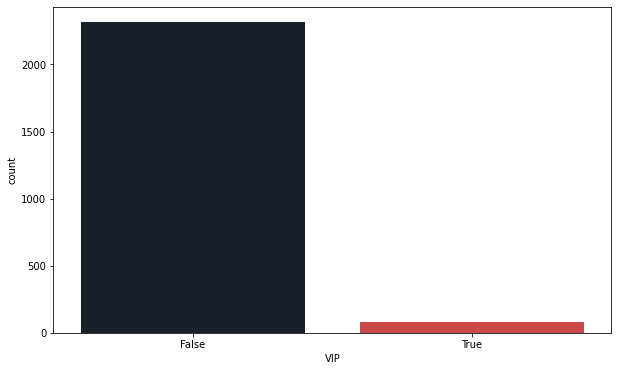

In [23]:
sns.countplot(x = cryo_true.VIP)

In [24]:
px.histogram(data_frame=cryo_true, x = 'Destination', color = 'HomePlanet')

Conclusion:
If a person is in CryoSleep the all costs/Rate of Services are going to be zero

##### CryoSleep equal to False

In [25]:
cryo_false = train_df_not_null[train_df_not_null.CryoSleep == False]
cryo_false.head(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True


In [26]:
px.box(data_frame= cryo_false, x= 'RoomService')

In [27]:
cryo_false_rates_zero = cryo_false.loc[(cryo_false.RoomService == 0) & (cryo_false.FoodCourt == 0) & 
    (cryo_false.ShoppingMall==0) & (cryo_false.Spa==0) & (cryo_false.VRDeck == 0)]

In [28]:
cryo_false_rates_zero.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
15,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
19,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True
20,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False
26,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True
39,0056_01,Europa,False,A/1/S,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Okulas Tractive,True
77,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,True,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
100,0146_01,Earth,False,G/25/S,TRAPPIST-1e,56.0,False,0.0,0.0,0.0,0.0,0.0,Verly Wolferguson,False
119,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False
120,0179_03,Earth,False,G/26/P,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Sallyl Webstephrey,True


In [29]:
cryo_false_rates_zero.shape

(418, 14)

<AxesSubplot:xlabel='Destination', ylabel='count'>

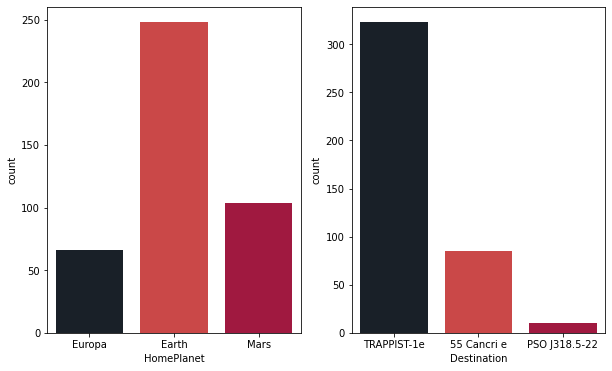

In [30]:
plt.subplot(1,2,1)
sns.countplot(data=cryo_false_rates_zero, x = 'HomePlanet')
plt.subplot(1,2,2)
sns.countplot(data = cryo_false_rates_zero, x = 'Destination')

In [31]:
px.histogram(data_frame=cryo_false_rates_zero, x = 'Destination', color = 'HomePlanet')

In [32]:
def Plots(df, x, y=None, title = None):
    fig = make_subplots(rows= 3, cols= 1,
 
    row_heights= [0.25,0.25,0.5])
    fig.append_trace(go.Box(x=df[x],  ), row=1, col = 1)
    fig.append_trace(go.Violin(x = df[x]), row=2, col=1)
    fig.append_trace(go.Histogram(x = df[x]), row = 3, col= 1)
    

    fig.update_xaxes(title_text= 'Box plot', row = 1, col = 1)
    fig.update_xaxes(title_text= 'Voilin plot', row = 2, col=1)
    fig.update_xaxes(title_text = 'Histogram', row=3, col=1)
    fig.update_layout(title_text = title , height = 1200, width = 1000, showlegend = False)
    fig.show()

#### Filling Null values of all cost columns

As we can fill RoomService null values by taking help from CryoSleep column and Other rate/services Columns
like:
1. if CryoSleep is False, then the null value is filled by median
2. if all other services columns are equal to zero and CryoSleep is True, then Null value is also Zero (I am replace all values with zero where CryoSleep is True.)

In [33]:
train_df_1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [34]:
null_before = train_df_1[train_df_1.CryoSleep == True].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == True].isnull().sum(), null_before

(PassengerId      0
 HomePlanet      75
 CryoSleep        0
 Cabin           84
 Destination     48
 Age             82
 VIP              0
 RoomService     68
 FoodCourt       70
 ShoppingMall    96
 Spa             65
 VRDeck          62
 Name            62
 Transported      0
 dtype: int64,
 712)

In [35]:
null_before_false = train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum(), train_df_1[train_df_1.CryoSleep == False].isnull().sum()

(1143,
 PassengerId       0
 HomePlanet      124
 CryoSleep         0
 Cabin           108
 Destination     130
 Age              96
 VIP               0
 RoomService     111
 FoodCourt       110
 ShoppingMall    104
 Spa             113
 VRDeck          119
 Name            128
 Transported       0
 dtype: int64)

In [36]:
train_df_1.loc[train_df_1.CryoSleep == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0 

In [37]:
null_after = train_df_1[train_df_1.CryoSleep == True].isnull().sum().sum()
train_df_1[train_df_1.CryoSleep == True].isnull().sum(), null_after

(PassengerId      0
 HomePlanet      75
 CryoSleep        0
 Cabin           84
 Destination     48
 Age             82
 VIP              0
 RoomService      0
 FoodCourt        0
 ShoppingMall     0
 Spa              0
 VRDeck           0
 Name            62
 Transported      0
 dtype: int64,
 351)

In [38]:
print(f"The Null values are reduced by {(null_before - null_after)*100/(null_before)}")

The Null values are reduced by 50.70224719101124


In [39]:

fig = go.Figure()
fig.add_trace(go.Box(y= cryo_false.RoomService 
    ,name='Room Service', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.FoodCourt, 
    name= 'Food Court', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.ShoppingMall, 
    name= 'Shopping mall', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.Spa, 
    name= 'Spa', boxmean = True))

fig.add_trace(go.Box(y = cryo_false.VRDeck, 
    name= 'VRDeck', boxmean = True))

In [40]:
fig = go.Figure()
fig.add_trace(go.Violin(y= cryo_false.RoomService 
    ,name='Room Service'))

fig.add_trace(go.Violin(y = cryo_false.FoodCourt, 
    name= 'Food Court'))

fig.add_trace(go.Violin(y = cryo_false.ShoppingMall, 
    name= 'Shopping mall'))

fig.add_trace(go.Violin(y = cryo_false.Spa, 
    name= 'Spa'))

fig.add_trace(go.Violin(y = cryo_false.VRDeck, 
    name= 'VRDeck'))

In [41]:
cryo_false.median(numeric_only=True)

Age             28.0
VIP              0.0
RoomService      3.0
FoodCourt        5.0
ShoppingMall     2.0
Spa              7.0
VRDeck           4.0
Transported      0.0
dtype: float64

So we are going to replace Null Values using Median

In [42]:
train_df_1 = train_df_1.fillna(cryo_false.median(numeric_only= True))

In [43]:
train_df_1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [44]:
null_after_false = train_df_1[train_df_1.CryoSleep == False].isnull().sum().sum()

print(f"The reduction in null values when CryoSleep is False is {(null_before_false-null_after_false)*100/null_before_false}")

The reduction in null values when CryoSleep is False is 57.13035870516185


In [45]:
print(f"{y_}Total Reduction in null values is: ")
total_null = train_df.isnull().sum().sum()
total_null_after = train_df_1.isnull().sum().sum()
print(f"{b_}{(total_null - total_null_after)*100/total_null}")

Total Reduction in null values is: 
52.8995756718529


#### Trying to fill remaining columns

1. I am not going to fill names columns, Because we already have id column.
2. It is impossible to fill Cabin Column null value to just drop it.
3. You can use KNN imputation to fill remaining null values, but i am going to drop null values now. 

In [46]:
train_df_1.drop('Name', axis = 1, inplace= True)

In [47]:
train_df_1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [48]:
train_df_1.shape

(8693, 13)

In [49]:
a = round(((train_df_1.shape[0]-train_df_1.dropna(axis = 0).shape[0])*100/train_df_1.shape[0]), 4)
print(f"{bl_} After Dropping Null values the dataset is reduced by {b_}{a}")

 After Dropping Null values the dataset is reduced by 8.8922


In [50]:
train_df_1.dropna(axis = 0, inplace= True)

Note - If you decide to keep Name Column then the reduction will be near 10%, So you can same 1.1% (90 rows) of data

### Now the dataset is completly clean and free from null values, So now we can go for Data Analysis

## Visualizations and Analysis

In [96]:
def Plots(df, x, y=None, title = None):
    fig = make_subplots(rows= 3, cols= 1,
 
    row_heights= [0.25,0.25,0.5])
    fig.append_trace(go.Box(x=df[x], ), row=1, col = 1)
    fig.append_trace(go.Violin(x = df[x]), row=2, col=1)
    fig.append_trace(go.Histogram(x = df[x]), row = 3, col= 1)
    

    fig.update_xaxes(title_text= 'Box plot', row = 1, col = 1)
    fig.update_xaxes(title_text= 'Voilin plot', row = 2, col=1)
    fig.update_xaxes(title_text = 'Histogram', row=3, col=1)
    fig.update_layout(title_text = title , height = 1200, width = 1000, showlegend = False)
    fig.show()


def Pie_plots(data_frame, feature_name):
    label = data_frame[feature_name].value_counts().index
    values = data_frame[feature_name].value_counts().values
    fig = go.Figure(data=[go.Pie(labels=label, values = values,
         hole=0.3, pull = [0.025]*len(label),
         )])
    fig.show()

def Scatter_plot(data_frame, feature1, feature2, count_plot = None, size = None, color = None):
    fig = px.scatter(data_frame= data_frame, x = feature1, y= feature2,
        color = color, size = size, marginal_x='histogram', marginal_y= 'violin')
    fig.update_layout(width = 1000, height = 800)
    fig.show()


In [97]:
Scatter_plot(train_df_1, 'RoomService', 'FoodCourt', color= 'CryoSleep')

In [75]:
Plots(train_df_1, x='RoomService', title = 'Room Service rates')

In [99]:
Pie_plots(train_df_1, 'HomePlanet')

In [98]:
Pie_plots(train_df_1, 'CryoSleep')